In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# 1) Bigram model - Count Matrix

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
N = torch.zeros([27, 27], dtype=torch.int32)

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = dict(zip(stoi.values(), stoi.keys()))

In [5]:
nchar = len(stoi)
N = torch.zeros([nchar, nchar], dtype=torch.int32)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

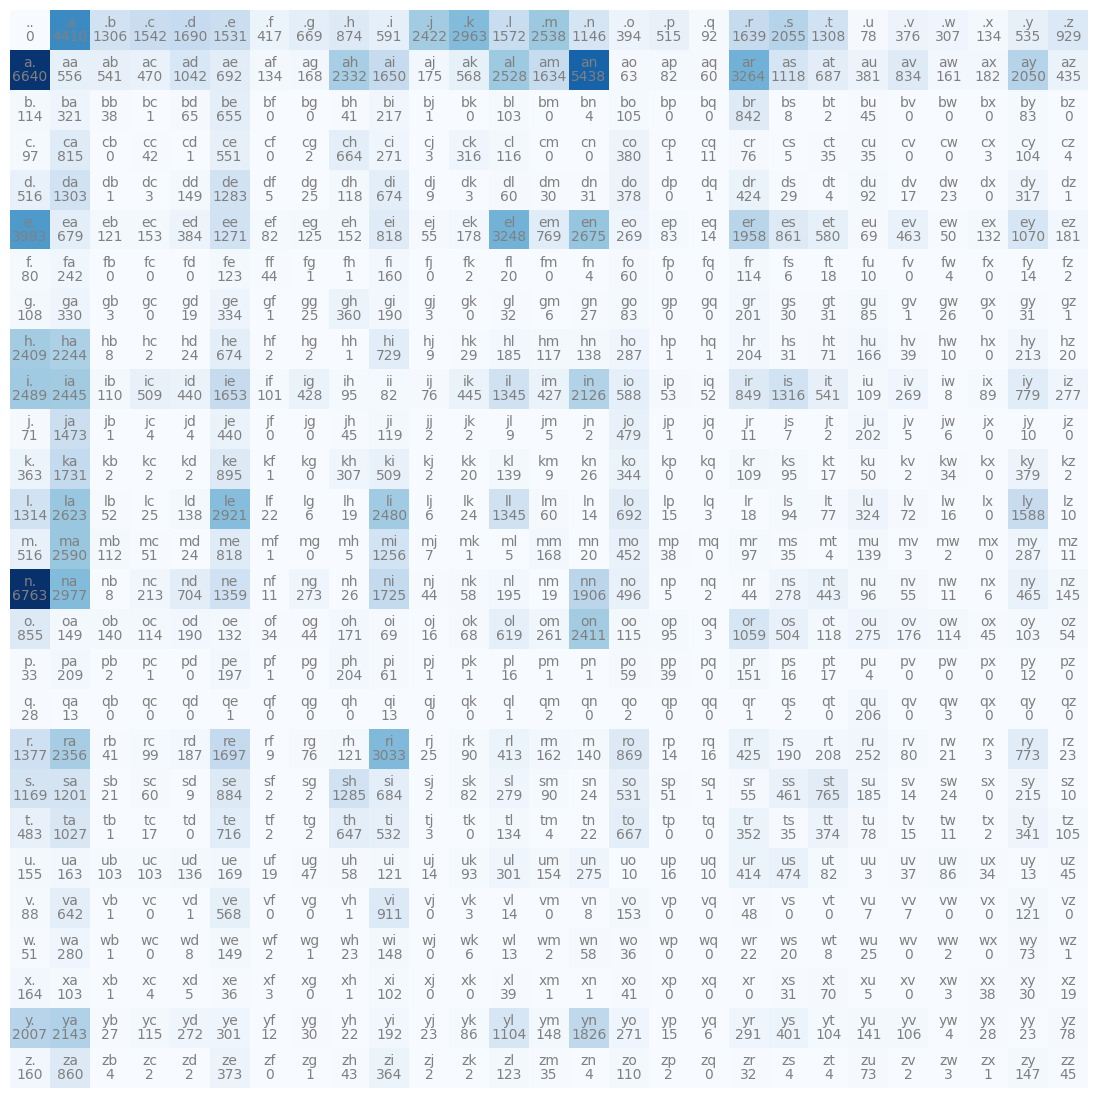

In [6]:
plt.figure(figsize=(14, 14))
plt.imshow(N, cmap='Blues')
for i in range(nchar):
    for j in range(nchar):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off');

# 2) Bigram model - Probability Matrix

In [7]:
P = (N + 1).float()
P /= P.sum(dim=1, keepdim=True)

In [8]:
g = torch.Generator().manual_seed(2147483647)

In [9]:
for _ in range(10):
    ix = 0
    name = ''
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name += itos[ix]
        if ix == 0:
            print(name)
            break

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [10]:
for _ in range(10):
    ix = 0
    name = ''
    while True:
        p = torch.ones(27) / 27
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name += itos[ix]
        if ix == 0:
            print(name)
            break

idcx.
cekmzucjnjoeovjvrggqrjr.
cfbhabkslpokc.
xtxwbpmknuusxdgzfexhwqpldpdnwzvkyxsqjforqqpfxstwkfoufhvwfhmsuyyotvcvvqpfcbydjcouhkajkhqnnpqmmllaordqy.
gszpw.
zlgijinangzzuulsyvqrufuawavsdbnwvlmrypvgrsfgpshgnmwafqmsjdvbhngvoiigxhkwdltrdkwnagzyknqv.
lfstdqigvncdoidetsukgdp.
cfpjsxeqjcsmjwguzes.
woflfjxflylgbegpjdpovdtw.
dlzysqtrbhxhcdneiuum.


In [11]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
nll = -log_likelihood/n
print(f'{nll=}')

nll=tensor(2.4544)


# 3) Bigram model - Neural Networks

In [12]:
# Dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [13]:
# Encoding
xenc = F.one_hot(xs, num_classes=27).float()

In [14]:
# Model
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [15]:
# Training
for i in range(1000):
    # Forwards pass
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(dim=1, keepdims=True)
    loss = -probs[torch.arange(xs.shape[0]), ys].log().mean() + 0.01*(W**2).mean()

    # Backward pass
    W.grad = None
    loss.backward()
    W.data += -50*W.grad

    print(f'Loss: {loss.item()}')

Loss: 3.768618583679199
Loss: 3.3788065910339355
Loss: 3.161090850830078
Loss: 3.027186155319214
Loss: 2.9344842433929443
Loss: 2.867231607437134
Loss: 2.8166542053222656
Loss: 2.777146339416504
Loss: 2.7452542781829834
Loss: 2.7188305854797363
Loss: 2.696505308151245
Loss: 2.6773722171783447
Loss: 2.6608054637908936
Loss: 2.6463515758514404
Loss: 2.633664846420288
Loss: 2.622471570968628
Loss: 2.6125476360321045
Loss: 2.6037068367004395
Loss: 2.595794916152954
Loss: 2.5886809825897217
Loss: 2.5822560787200928
Loss: 2.576429843902588
Loss: 2.5711236000061035
Loss: 2.566272735595703
Loss: 2.5618228912353516
Loss: 2.5577263832092285
Loss: 2.5539441108703613
Loss: 2.5504424571990967
Loss: 2.5471925735473633
Loss: 2.5441696643829346
Loss: 2.5413525104522705
Loss: 2.538721799850464
Loss: 2.536262035369873
Loss: 2.5339579582214355
Loss: 2.5317976474761963
Loss: 2.5297679901123047
Loss: 2.527860164642334
Loss: 2.5260636806488037
Loss: 2.5243704319000244
Loss: 2.522773027420044
Loss: 2.5212638

Loss: 2.4812557697296143
Loss: 2.4812498092651367
Loss: 2.4812445640563965
Loss: 2.481238603591919
Loss: 2.4812331199645996
Loss: 2.4812276363372803
Loss: 2.481222152709961
Loss: 2.4812169075012207
Loss: 2.4812116622924805
Loss: 2.481206178665161
Loss: 2.481200695037842
Loss: 2.4811959266662598
Loss: 2.4811906814575195
Loss: 2.4811854362487793
Loss: 2.4811806678771973
Loss: 2.481175661087036
Loss: 2.481170415878296
Loss: 2.481165647506714
Loss: 2.4811606407165527
Loss: 2.4811558723449707
Loss: 2.4811511039733887
Loss: 2.4811463356018066
Loss: 2.4811413288116455
Loss: 2.4811365604400635
Loss: 2.4811320304870605
Loss: 2.4811277389526367
Loss: 2.4811229705810547
Loss: 2.4811184406280518
Loss: 2.481114149093628
Loss: 2.481109619140625
Loss: 2.481105089187622
Loss: 2.4811007976531982
Loss: 2.4810962677001953
Loss: 2.4810922145843506
Loss: 2.4810876846313477
Loss: 2.481083393096924
Loss: 2.481079578399658
Loss: 2.4810752868652344
Loss: 2.4810712337493896
Loss: 2.481066942214966
Loss: 2.48106

Loss: 2.4805569648742676
Loss: 2.480556011199951
Loss: 2.480555534362793
Loss: 2.4805548191070557
Loss: 2.4805545806884766
Loss: 2.48055362701416
Loss: 2.480552911758423
Loss: 2.4805526733398438
Loss: 2.4805521965026855
Loss: 2.4805514812469482
Loss: 2.480550765991211
Loss: 2.4805502891540527
Loss: 2.4805495738983154
Loss: 2.480548858642578
Loss: 2.480548143386841
Loss: 2.4805479049682617
Loss: 2.4805471897125244
Loss: 2.480546474456787
Loss: 2.480545997619629
Loss: 2.4805455207824707
Loss: 2.4805448055267334
Loss: 2.480544090270996
Loss: 2.480543613433838
Loss: 2.4805431365966797
Loss: 2.4805424213409424
Loss: 2.480541944503784
Loss: 2.480541467666626
Loss: 2.4805409908294678
Loss: 2.4805402755737305
Loss: 2.4805397987365723
Loss: 2.480538845062256
Loss: 2.4805386066436768
Loss: 2.4805378913879395
Loss: 2.4805376529693604
Loss: 2.480536937713623
Loss: 2.480536460876465
Loss: 2.4805357456207275
Loss: 2.4805350303649902
Loss: 2.480534553527832
Loss: 2.480534076690674
Loss: 2.48053359985

In [17]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(10):
    ix = 0
    name = ''
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts/counts.sum(1, keepdims=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        name += itos[ix]
        if ix == 0:
            print(name)
            break

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.
odaren.
iaddash.
h.
jionatien.
egwulo.


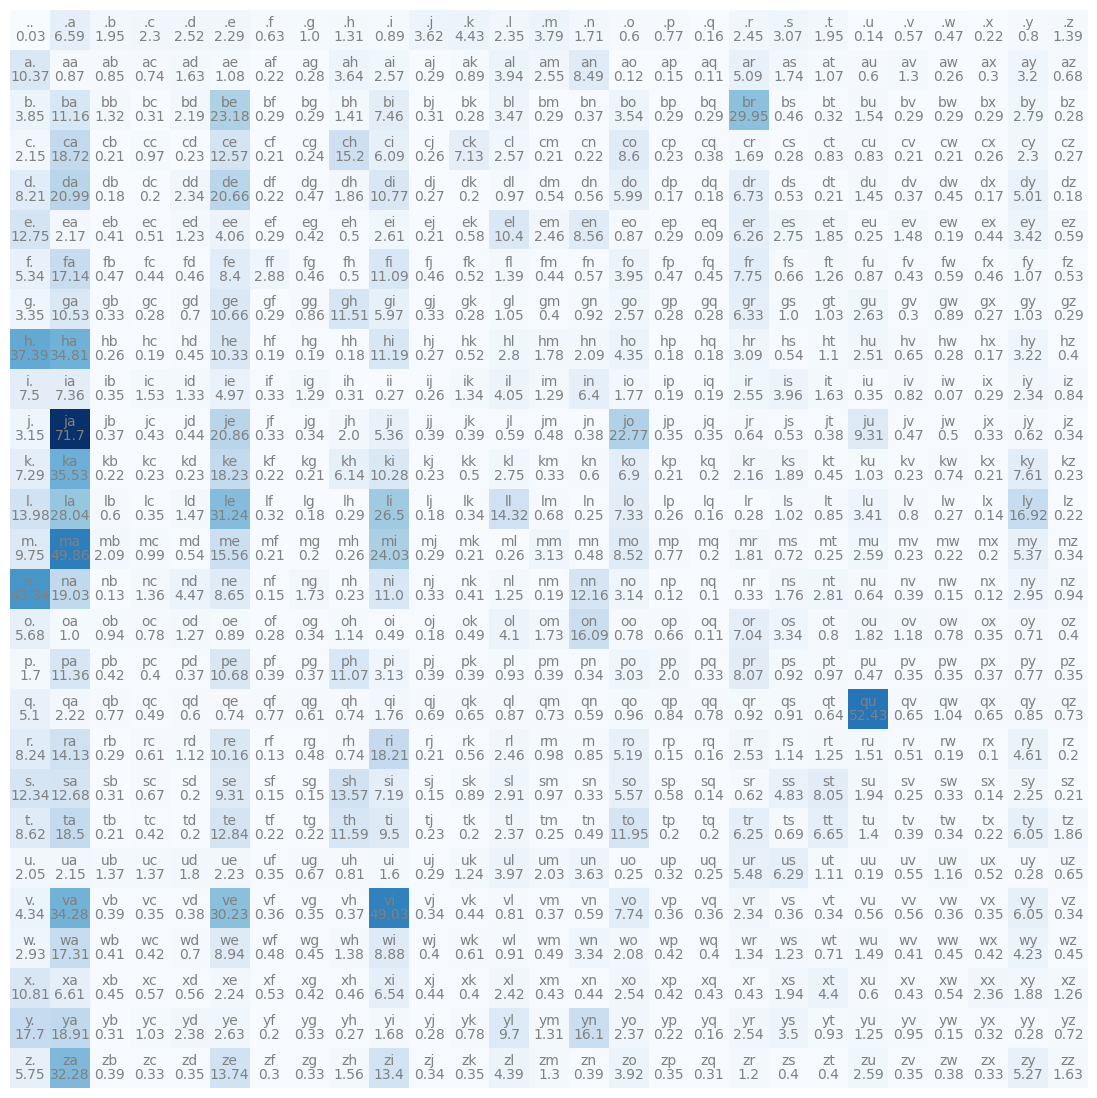

In [22]:
Nw = W.exp().detach().numpy()
plt.figure(figsize=(14, 14))
plt.imshow(Nw, cmap='Blues')
for i in range(nchar):
    for j in range(nchar):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, np.round(Nw[i, j].item(), 2), ha='center', va='top', color='gray')
plt.axis('off');